# Notebook 11 - QEDFT electron-photon exchange approximation for one electron coupled to one photon mode in one dimension 
-----------------------------------------------------------------------------------------------------------


## A. 11.1
------

For one dimensional cases, the electron-photon exchange potential for one-electron cases is 
$$
v_{\rm{px}}(x) = 
\left(\sum_{\alpha=1}^{M_{p}}\frac{{\tilde{\lambda}}_{\alpha}^{2}}{2\tilde{\omega}_{\alpha}^{2}}\right)\frac{\partial_{x}^{2}\rho^{\frac{1}{2}}(x)}{\rho^{\frac{1}{2}}(x)}.
$$

(Optional) The electron-photon exchange potential for one-electron cases in $d$-dimension is
$$
v_{\rm{px}}(\mathbf{r}) = \sum_{\alpha=1}^{M_{p}}\frac{{\tilde{\lambda}}_{\alpha}^{2}}{2\tilde{\omega}_{\alpha}^{2}} \frac{(\tilde{\boldsymbol{\varepsilon}}_{\alpha}\cdot\nabla)^{2}\rho^{\frac{1}{2}}(\mathbf{r})}{\rho^{\frac{1}{2}}(\mathbf{r})}.
$$


The electron-photon exchange potential within the LDA in one dimension can be obtained 
$$
v_{\rm{pxLDA}}(x)=-\frac{\pi^{2}}{8} \left(\sum_{\alpha=1}^{M_{p}} \frac{\tilde{\lambda}_{\alpha}^{2}}{\tilde{\omega}_{\alpha}^{2}}\right) \rho^{2}(x).
$$

The isotropic electron-photon exchange potential in $d$ dimension is 
$$
v_{\rm{pxLDA}}^{\rm{iso}}(\mathbf{r}) = -\frac{2\pi^{2}}{d} \sum_{\alpha=1}^{M_{p}}\frac{\tilde{\lambda}_{\alpha}^{2}}{\tilde{\omega}_{\alpha}^{2}} \left(\frac{\rho(\mathbf{r})}{2V_{d}}\right)^{\frac{2}{d}}
$$

In [2]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

# Define the plot function
def plot_density(x, analytical_solution, numerical_solution):
    ts = 20
    ls = 20
    lgs = 20
    lw = 4
    ms = 10
    mew = 4
    nstep = 10

    # Plot the numerical and analytical eigenfunctions
    plt.figure(figsize=(12, 6))


    plt.plot(x,analytical_solution**2, 'k-',lw=lw, label='Analytical')
    plt.plot(x[::nstep],numerical_solution[::nstep],
             color='r', marker='x', ms=ms, mew= mew, linestyle="None", label='Numerical')

    # plt.title('Real Part of Eigenfunctions')
    plt.tick_params(which='both', direction='in', labelsize=ts)
    plt.xlabel('Position [Bohr]', size=ls)
    plt.ylabel(r'Density [Bohr$^{-1}$]', size=ls)
    plt.legend(prop={'size':lgs})

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Define the harmonic potential
def v_harmonic(x):
    return ??????

# Define parameters
L = 10.0  # Length of the spatial dimension
N = 1501  # Number of grid points
dx = L / N  # Grid spacing
x = np.linspace(0, L, N)  # Spatial grid

# Center the grid around the origin
x = ??????

# Construct the discretized second derivative operator
A = ??????

# Construct the local potential
potential = v_harmonic(x)
V = ??????

# Construct the Hamiltonian
H = A + V

# Solve the eigenvalue problem
eigenvalues, eigenfunctions = np.linalg.eigh(H)
print('First three numerical eigenvalues')
print(eigenvalues[:3])

# Compute the electron density from the eigenfunction of the ground state
rho_0 = ??????

# Analytical eigenfunction for the ground state
analytical_solution = 1./(np.pi**(1./4.))*np.exp(-x**2/2.0)


# plotting the figure
plot_density(x, analytical_solution, rho_0)

SyntaxError: invalid syntax (479073895.py, line 34)

## A. 11.2 Warm up: solve a harmonic oscillator
------

First three numerical eigenvalues
[0.50033194 1.50099306 2.50164869]


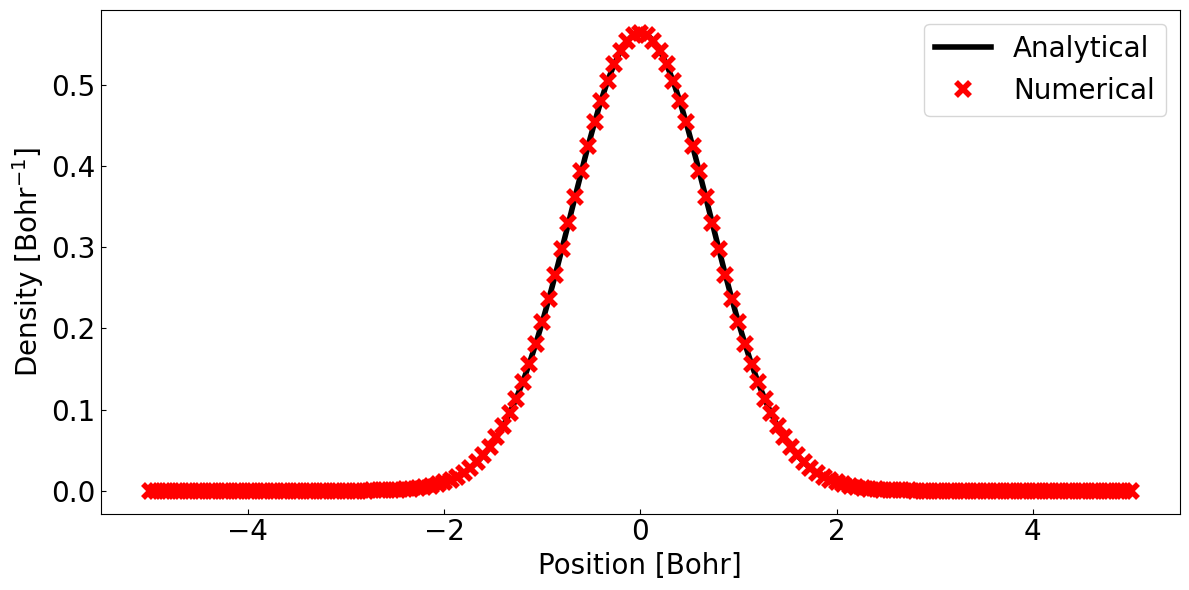

In [4]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

# Define the harmonic potential
def v_harmonic(x):
    return 0.5*x**2

# Define parameters
L = 10.0  # Length of the spatial dimension
N = 1501  # Number of grid points
dx = L / N  # Grid spacing
x = np.linspace(0, L, N)  # Spatial grid

# Center the grid around the origin
x = x-x[int((N-1)/2)]

# Construct the discretized second derivative operator
A = np.zeros((N, N))
A = -2*np.eye(N, k=0) + np.eye(N, k=1) + np.eye(N, k=-1)
A /= -2*dx**2  # Scale by 2*(dx)^2

# Construct the local potential
potential = v_harmonic(x)
V = np.zeros((N, N))
V = np.diag(potential)

# Construct the Hamiltonian
H = A + V

# Solve the eigenvalue problem
eigenvalues, eigenfunctions = np.linalg.eigh(H)
print('First three numerical eigenvalues')
print(eigenvalues[:3])

rho_0 = np.abs(eigenfunctions[:,0])**2/dx

# Analytical eigenfunction for the ground state
# analytical_solution = special.hermite(1)
analytical_solution = 1./(np.pi**(1./4.))*np.exp(-x**2/2.0)


# Parameters for plotting the figure
ts = 20
ls = 20
lgs = 20
lw = 4
ms = 10
mew = 4
nstep = 10

# Plot the numerical and analytical eigenfunctions
plt.figure(figsize=(12, 6))


plt.plot(x,analytical_solution**2, 'k-',lw=lw, label='Analytical')
plt.plot(x[::nstep],rho_0[::nstep],
         color='r', marker='x', ms=ms, mew= mew, linestyle="None", label='Numerical')

# plt.title('Real Part of Eigenfunctions')
plt.tick_params(which='both', direction='in', labelsize=ts)
plt.xlabel('Position [Bohr]', size=ls)
plt.ylabel(r'Density [Bohr$^{-1}$]', size=ls)
plt.legend(prop={'size':lgs})

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## A. 11.3 Solve the soft hydrogen atom outside a cavity
------

<Figure size 1200x600 with 0 Axes>

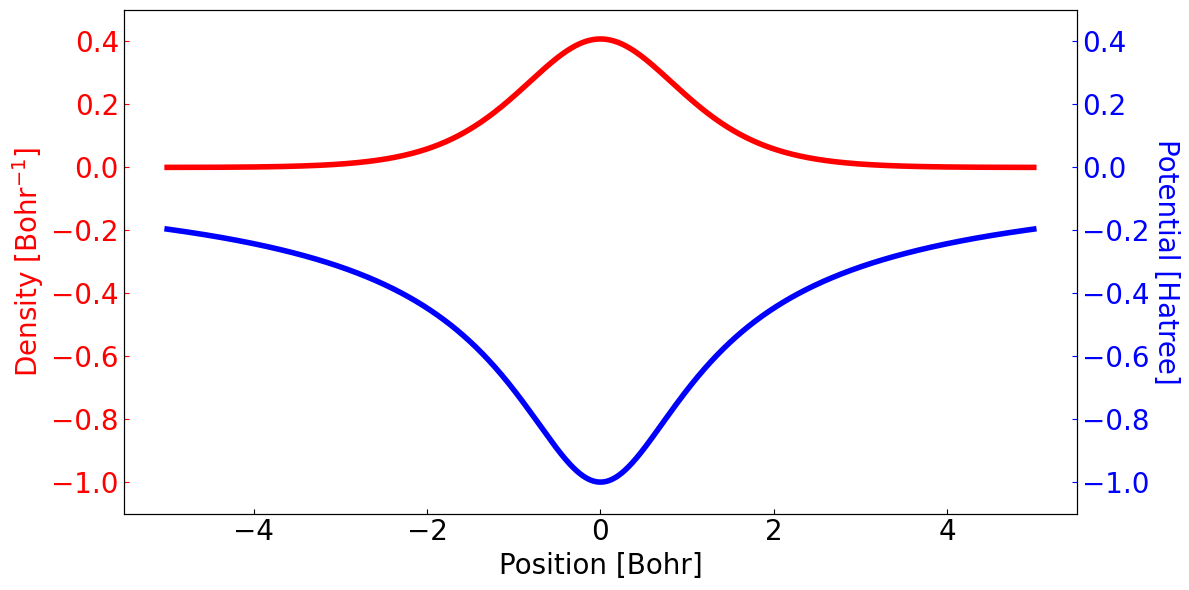

In [5]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

# Define the harmonic potential
def v_soft(x,a=1):
    return -1./np.sqrt(x**2+a**2)

# Define parameters
L = 10.0  # Length of the spatial dimension
N = 1501  # Number of grid points
dx = L / N  # Grid spacing
x = np.linspace(0, L, N)  # Spatial grid

# Center the grid around the origin
x = x-x[int((N-1)/2)]

# Construct the discretized second derivative operator
A = np.zeros((N, N))
A = -2*np.eye(N, k=0) + np.eye(N, k=1) + np.eye(N, k=-1)
A /= -2*dx**2  # Scale by 2*(dx)^2

# Construct the local potential
potential = v_soft(x)
V = np.zeros((N, N))
V = np.diag(potential)

# Construct the Hamiltonian
H = A + V

# Solve the eigenvalue problem
eigenvalues, eigenfunctions = np.linalg.eigh(H)
# print('First three numerical eigenvalues')
# print(eigenvalues[:3])

# Density of the ground state
rho_0 = np.abs(eigenfunctions[:,0])**2/dx

# Parameters for plotting the figure
ts = 20
ls = 20
lgs = 20
lw = 4
ms = 10
mew = 4
nstep = 10
labelpad = 22

# Plot the numerical and analytical eigenfunctions
plt.figure(figsize=(12, 6))
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.plot(x,rho_0, color='r', linestyle='-', lw=lw)
ax2.plot(x,potential, color='b', linestyle='-', lw=lw);


# plt.title('Real Part of Eigenfunctions')
ax1.tick_params(which='both', direction='in', labelsize=ts)
ax1.tick_params(which='both', axis='y', direction='in', labelsize=ts, colors='r')
ax1.set_xlabel('Position [Bohr]', size=ls)
ax1.set_ylabel(r'Density [Bohr$^{-1}$]', size=ls, color='r')
ax1.set_ylim([-1.1,0.5])

ax2.tick_params(which='both', direction='in', labelsize=ts)
ax2.tick_params(which='both', axis='y', direction='in', labelsize=ts, colors='b')
ax2.set_ylabel(r'Potential [Hatree]', size=ls, color='b', rotation=270, labelpad=labelpad)
ax2.set_ylim([-1.1,0.5])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## A. 11.4 Solve the soft hydrogen atom inside a cavity
------

interation: 1;    AbsDenDiff=5.535839e-02
interation: 2;    AbsDenDiff=6.872932e-03
interation: 3;    AbsDenDiff=9.341373e-04
interation: 4;    AbsDenDiff=1.291855e-04
interation: 5;    AbsDenDiff=1.793290e-05
interation: 6;    AbsDenDiff=2.491438e-06
interation: 7;    AbsDenDiff=3.462043e-07
interation: 8;    AbsDenDiff=4.810680e-08
interation: 9;    AbsDenDiff=6.686053e-09
interation: 10;    AbsDenDiff=9.316682e-10
interation: 11;    AbsDenDiff=1.275287e-10
interation: 12;    AbsDenDiff=1.916293e-11


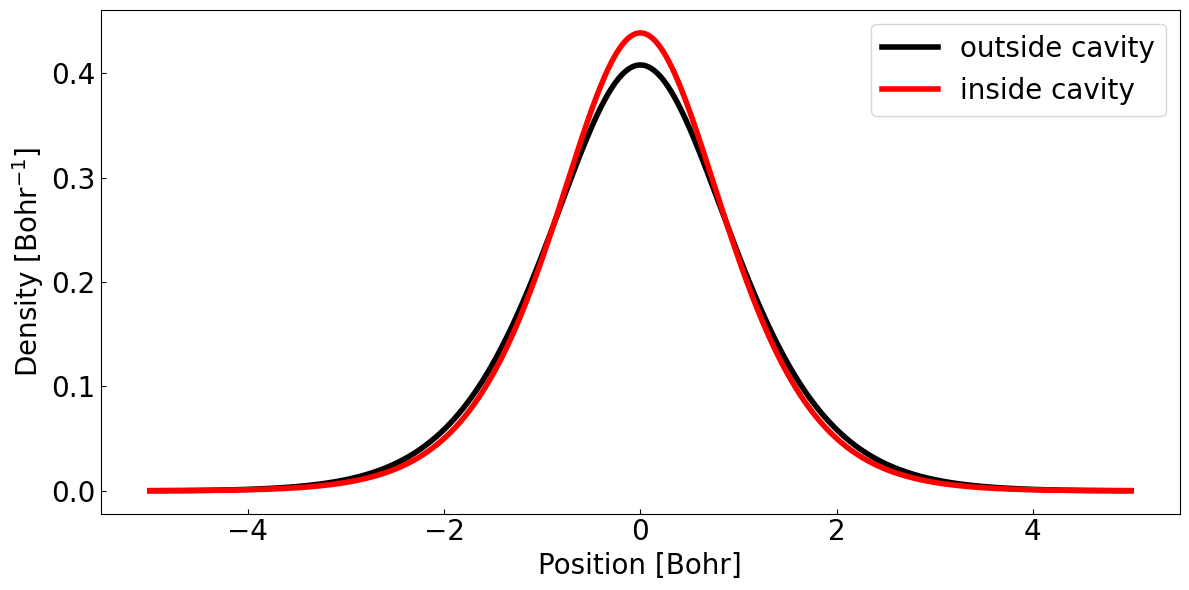

In [6]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

# Define the harmonic potential
def v_soft(x,a=1):
    return -1./np.sqrt(x**2+a**2)

# Define the pxLDA potential
def v_pxlda(rho,omega,lmcpl):
    return -(np.pi**2/8.0)*(lmcpl**2/(omega**2+lmcpl**2))*rho**2

# Define solver
def solve_H_get_rho(Hamiltonian):
    eigenvalues, eigenfunctions = np.linalg.eigh(Hamiltonian)
    rho_gs = np.abs(eigenfunctions[:,0])**2/dx
    return rho_gs

# Define get the rho difference
def get_rho_diff(rho_old, rho_new, dx):
    sum_abs_drho = np.sum(np.abs(rho_new - rho_old))*dx
    return sum_abs_drho

# Define parameters
L = 10.0  # Length of the spatial dimension
N = 1501  # Number of grid points
omega = 1.0
lmcpl = 1 #1e-1 #1 #10


dx = L / N  # Grid spacing
x = np.linspace(0, L, N)  # Spatial grid
# Center the grid around the origin
x = x-x[int((N-1)/2)]

# Construct the discretized second derivative operator
A = np.zeros((N, N))
A = -2*np.eye(N, k=0) + np.eye(N, k=1) + np.eye(N, k=-1)
A /= -2*dx**2  # Scale by 2*(dx)^2

# Construct the local potential
potential = v_soft(x)
V = np.zeros((N, N))
V = np.diag(potential)

# Construct the Hamiltonian
H0 = A + V
rho_outside = solve_H_get_rho(H0)
rho_old = np.copy(rho_outside)

iteration = 0
absden = 1e-10

drho = np.sum(np.abs(rho_old))

# Self consistent loop
while drho > absden:
    iteration = iteration + 1

    vpxlda = v_pxlda(rho_old,omega,lmcpl)
    VpxLDA = np.diag(vpxlda)

    H = H0 + VpxLDA
    rho_new = solve_H_get_rho(H)
    drho = get_rho_diff(rho_old, rho_new, dx)

    rho_old = rho_new

    line = f"interation: {iteration};    AbsDenDiff={drho:12.6e}"
    print(line)


# Parameters for plotting the figure
ts = 20
ls = 20
lgs = 20
lw = 4
ms = 10
mew = 4
nstep = 10
labelpad = 22

# Plot the numerical and analytical eigenfunctions
plt.figure(figsize=(12, 6))

plt.plot(x,rho_outside, color='k', linestyle='-', lw=lw, label='outside cavity')
plt.plot(x,rho_new, color='r', linestyle='-', lw=lw, label='inside cavity')

plt.tick_params(which='both', direction='in', labelsize=ts)
plt.xlabel('Position [Bohr]', size=ls)
plt.ylabel(r'Density [Bohr$^{-1}$]', size=ls)
plt.legend(prop={'size':lgs})

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()